In [353]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot


#from dataprep.eda import *
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV

import math


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import SGDRegressor



import datetime as dt
from prettytable import PrettyTable


In [354]:
housing_df = pd.read_csv("./housing_dataset.csv")
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [355]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20629.000000,20625.000000,20433.000000,20621.000000,20626.000000,20632.000000,20560.000000
mean,-119.569704,35.631861,28.633380,2636.314812,537.870553,1425.785510,499.675555,3.871003,207334.239348
std,2.003532,2.135952,12.584167,2182.184573,421.385070,1132.799376,382.405161,1.899969,115352.171422
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563400,120600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,410.000000,3.535250,180400.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,265225.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 1.a Identifying outliers in median_house_value using whiskers approach

In [356]:
Q1 = housing_df["median_house_value"].quantile(0.25)
Q3 = housing_df["median_house_value"].quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

outliers = housing_df[(housing_df["median_house_value"] < LB) | (housing_df["median_house_value"] > UB)]
outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19568,-118.37,33.81,33.0,5057.0,790.0,2021.0,748.0,6.8553,482200.0,NEAR OCEAN
19569,-117.19,32.69,35.0,2921.0,438.0,1042.0,415.0,6.3612,482700.0,NEAR OCEAN
19570,-117.87,33.60,34.0,3415.0,779.0,1275.0,718.0,4.4980,482900.0,<1H OCEAN
19571,-118.59,34.14,19.0,1303.0,155.0,450.0,145.0,10.5511,483100.0,<1H OCEAN
19572,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


# 1.b Identifying outliers in median_house_value using z-score approach


In [357]:
z_scores = stats.zscore(housing_df["median_house_value"])
threshold = 2
outliers_zscore = housing_df[abs(z_scores) > threshold]
outliers_zscore

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


# 2. a i - choosing weather mean/median is better for missing values

In [358]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

In [359]:
housing_removed_outliers = outliers.copy()

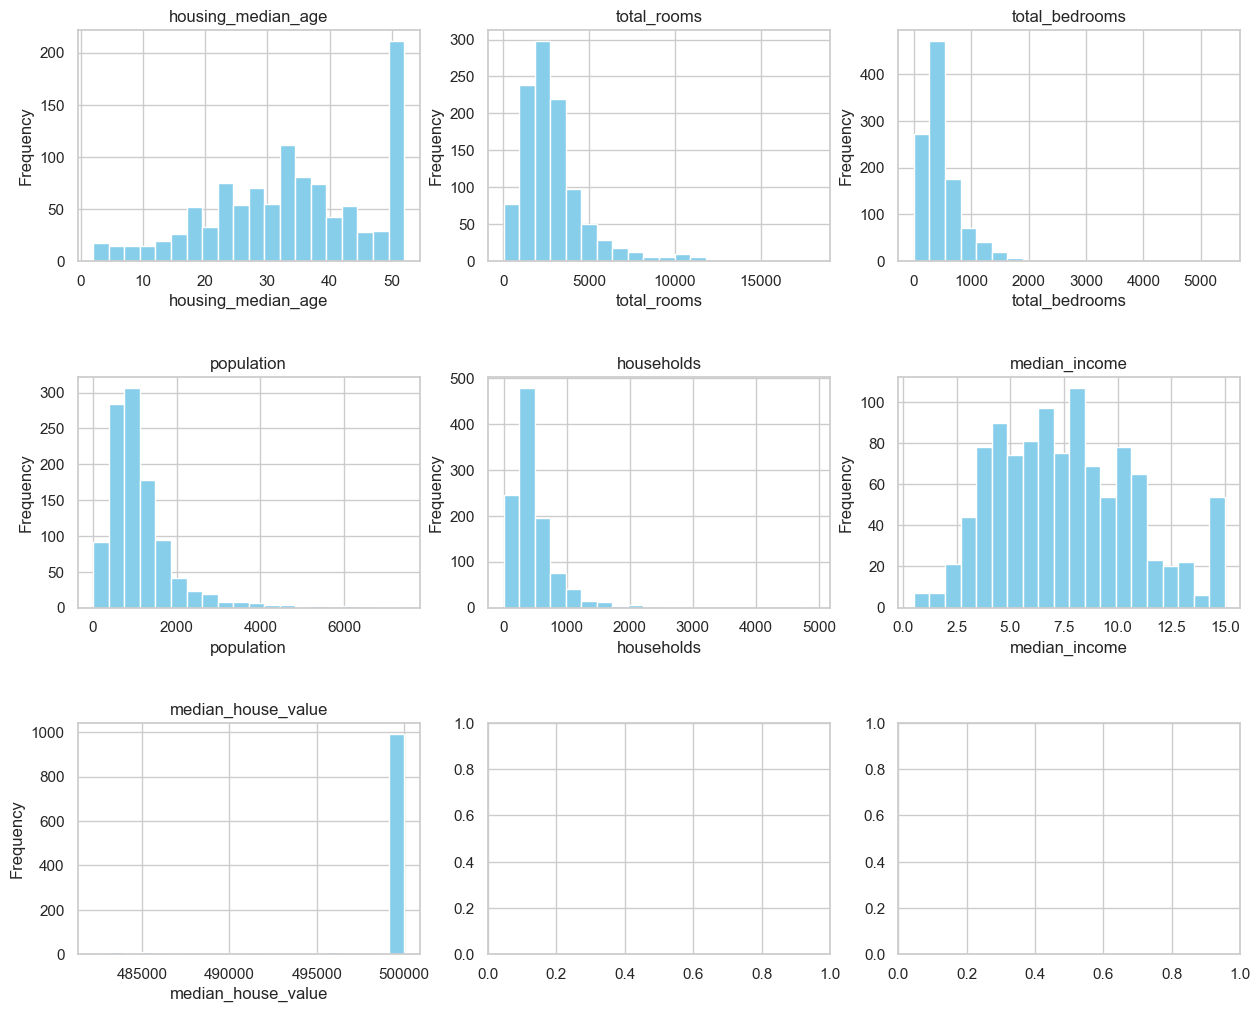

In [360]:
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    row, col = i // 3, i % 3
    axes[row, col].hist(housing_removed_outliers[column], bins=20, color='skyblue')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")
    

    
plt.show()

## Using mean for normally distributed data i.e., median income and median for skewed data

In [361]:
mean_value = housing_removed_outliers['median_income'].mean()
housing_removed_outliers['median_income'].fillna(mean_value, inplace=True)




In [362]:
median_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']

for i in median_features:
    median_value = housing_removed_outliers[i].median()
    housing_removed_outliers[i].fillna(median_value, inplace=True)

In [363]:
housing_removed_outliers.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       7
dtype: int64

## b - removing missing values on categoricl data using random forest

In [364]:
with_missing = housing_removed_outliers[housing_removed_outliers['ocean_proximity'].isnull()]
without_missing = housing_removed_outliers[~housing_removed_outliers['ocean_proximity'].isnull()]
without_missing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19568,-118.37,33.81,33.0,5057.0,790.0,2021.0,748.0,6.8553,482200.0,NEAR OCEAN
19569,-117.19,32.69,35.0,2921.0,438.0,1042.0,415.0,6.3612,482700.0,NEAR OCEAN
19570,-117.87,33.60,34.0,3415.0,779.0,1275.0,718.0,4.4980,482900.0,<1H OCEAN
19571,-118.59,34.14,19.0,1303.0,155.0,450.0,145.0,10.5511,483100.0,<1H OCEAN
19572,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [365]:
with_missing = housing_removed_outliers[housing_removed_outliers['ocean_proximity'].isnull()]
without_missing = housing_removed_outliers[~housing_removed_outliers['ocean_proximity'].isnull()]

clf = RandomForestClassifier()
clf.fit(without_missing[['longitude', 'latitude']], without_missing['ocean_proximity'])
predictions = clf.predict(with_missing[['longitude', 'latitude']])

housing_removed_outliers.loc[housing_removed_outliers['ocean_proximity'].isnull(), 'ocean_proximity'] = predictions

In [366]:
housing_removed_outliers.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [367]:
housing_removed_outliers.shape

(1072, 10)

# Investigate the existence of errors/inconsistencies in the fields and solve them.

In [368]:
housing_removed_outliers.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,-119.694879,35.223125,33.877799,2926.186567,500.683769,1110.003731,465.905784,7.617549,499251.459888
std,1.958413,1.791623,13.026046,2128.864358,394.730779,809.641823,360.717290,3.224325,2991.626375
min,-122.710000,32.680000,2.000000,8.000000,1.000000,13.000000,1.000000,0.499900,482200.000000
25%,-122.120000,33.970000,25.000000,1669.500000,270.000000,639.000000,254.000000,5.101950,500001.000000
50%,-118.470000,34.130000,34.000000,2490.000000,404.000000,925.500000,375.500000,7.309100,500001.000000
75%,-118.310000,37.410000,44.250000,3506.250000,603.500000,1330.500000,572.000000,9.930325,500001.000000
max,-116.430000,38.910000,52.000000,18132.000000,5419.000000,7431.000000,4930.000000,15.000100,500001.000000


In [369]:
# Check data types
print("Data Types:")
print(housing_removed_outliers.dtypes)



consistency_errors = housing_removed_outliers[housing_removed_outliers['total_rooms'] < housing_removed_outliers['total_bedrooms']]

if not consistency_errors.empty:
    range_errors.append(consistency_errors)

if not consistency_errors.empty:
    print("Consistancy Errors:")
    for error_df in consistency_errors:
        print(error_df)


categorical_errors = housing_removed_outliers[~housing_removed_outliers['ocean_proximity'].isin(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'])]

if not categorical_errors.empty:
    print("\nCategorical Data Errors:")
    print(categorical_errors)






Data Types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


## the data type for all fields are appropriate and there were no inconsistancy found in possible rows

## z-score scaling of num features

In [370]:

numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

scaler = StandardScaler()

housing_removed_outliers[numerical_features] = scaler.fit_transform(housing_removed_outliers[numerical_features])


In [371]:
housing_removed_outliers.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1072.000000,1072.000000,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1072.000000,1.072000e+03,1072.000000
mean,-119.694879,35.223125,9.279476e-17,3.976918e-17,-4.639738e-17,1.325639e-17,0.000000,1.905607e-17,499251.459888
std,1.958413,1.791623,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467,1.000467e+00,2991.626375
min,-122.710000,32.680000,-2.448378e+00,-1.371411e+00,-1.266476e+00,-1.355557e+00,-1.289439,-2.208515e+00,482200.000000
25%,-122.120000,33.970000,-6.818602e-01,-5.905839e-01,-5.846806e-01,-5.820149e-01,-0.587731,-7.805580e-01,500001.000000
50%,-118.470000,34.130000,9.385698e-03,-2.049873e-01,-2.450503e-01,-2.279895e-01,-0.250745,-9.570768e-02,500001.000000
75%,-118.310000,37.410000,7.966380e-01,2.726027e-01,2.605934e-01,2.724652e-01,0.294257,7.176249e-01,500001.000000
max,-116.430000,38.910000,1.391878e+00,7.146022e+00,1.246574e+01,7.810795e+00,12.381380,2.290711e+00,500001.000000


# Encoding

In [372]:

label_encoder = LabelEncoder()

housing_removed_outliers['ocean_proximity'] = label_encoder.fit_transform(housing_removed_outliers['ocean_proximity'])


# creating 2 new features



In [373]:
# Calculate the new feature "bedrooms_per_room"
housing_removed_outliers['bedrooms_per_room'] = housing_removed_outliers['total_bedrooms'] / housing_removed_outliers['total_rooms']
# Calculate the new feature "rooms_per_household"
housing_removed_outliers['rooms_per_household'] = housing_removed_outliers['total_rooms'] / housing_removed_outliers['households']


In [374]:
housing_removed_outliers.shape

(1072, 12)

In [375]:
housing_removed_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household
19568,-118.37,33.81,-0.067419,1.001383,0.733288,1.125709,0.782402,-0.236516,482200.0,3,0.732275,1.279883
19569,-117.19,32.69,0.086191,-0.002437,-0.158875,-0.084032,-0.141190,-0.389829,482700.0,3,65.181161,0.017264
19570,-117.87,33.60,0.009386,0.229719,0.705408,0.203884,0.699195,-0.967956,482900.0,0,3.070735,0.328548
19571,-118.59,34.14,-1.142691,-0.762822,-0.876154,-0.815560,-0.890048,0.910243,483100.0,0,1.148570,0.857057
19572,-122.18,37.81,-0.297835,-1.237945,-1.172697,-1.215924,-1.147988,-0.389457,483300.0,2,0.947294,1.078361
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,0.086191,-0.668831,-0.602423,-0.659863,-0.693126,-0.766983,500001.0,0,0.900709,0.964949
20636,-118.69,34.18,-1.757132,-0.822036,-0.919242,-0.858810,-0.962160,0.753890,500001.0,0,1.118250,0.854365
20637,-118.80,34.19,-2.294767,5.942941,4.362770,5.418498,4.676463,0.320325,500001.0,0,0.734110,1.270820
20638,-118.69,34.21,-1.833937,0.346268,-0.232378,0.085258,-0.263226,1.527994,500001.0,0,-0.671092,-1.315479


# Descriptive Analytics Tasks 
##  Investigate the distribution of housing prices across different ocean proximities in California.

C:\Users\Rj\AppData\Local\Temp\ipykernel_10060\4113169725.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




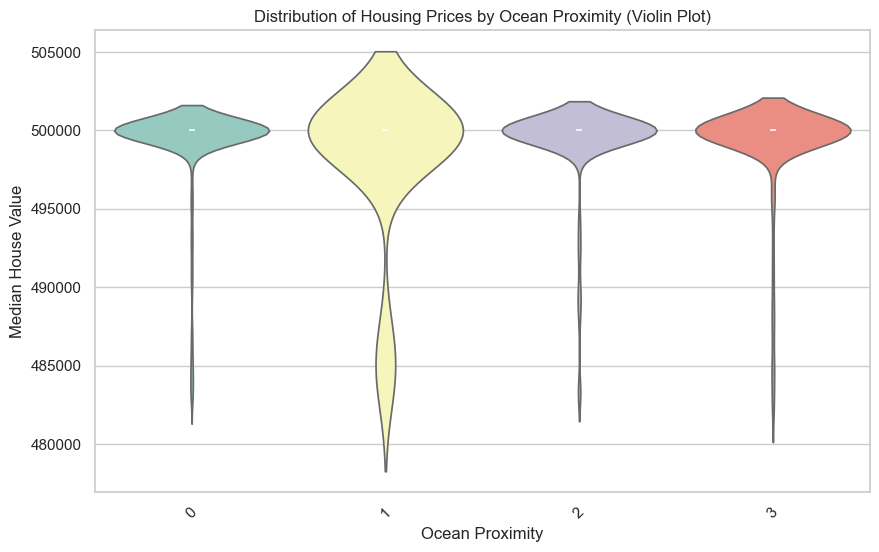

In [376]:


# Create a violin plot to show the distribution of median house values by ocean proximity
plt.figure(figsize=(10, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing_removed_outliers, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Distribution of Housing Prices by Ocean Proximity (Violin Plot)')
plt.show()


##  Analyze the relationship between median income and housing prices.


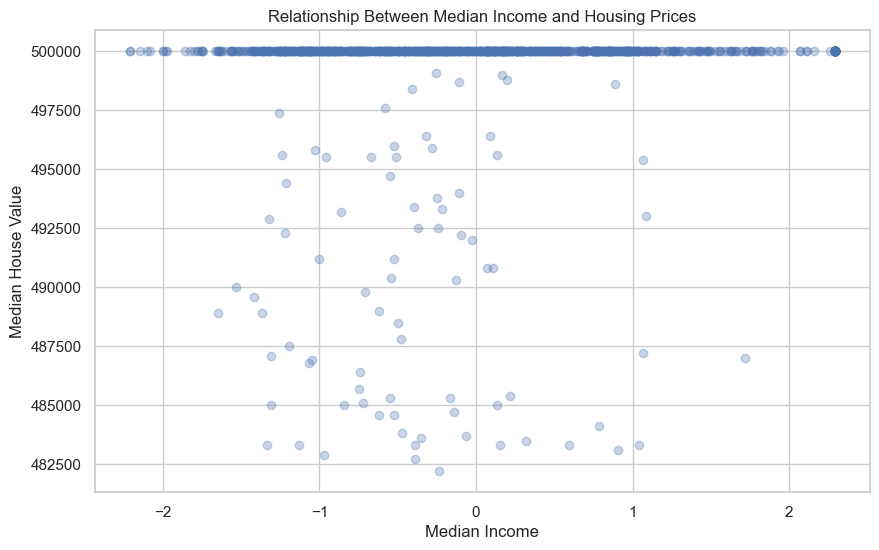

In [377]:

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
plt.scatter(housing_removed_outliers['median_income'], housing_removed_outliers['median_house_value'], alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relationship Between Median Income and Housing Prices')
plt.show()


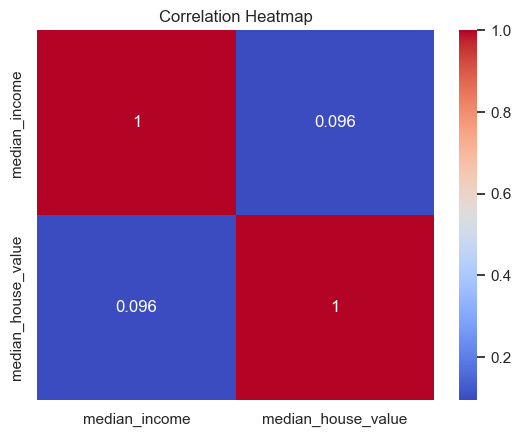

In [378]:

correlation_matrix = housing_removed_outliers[['median_income', 'median_house_value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [379]:
correlation = housing_removed_outliers['median_income'].corr(housing_removed_outliers['median_house_value'])
print(f'Correlation between Median Income and Median House Value: {correlation:.2f}')


Correlation between Median Income and Median House Value: 0.10


# ML Model Training and Testing Tasks

In [380]:
cleaned_df = housing_removed_outliers.copy()
cleaned_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household
19568,-118.37,33.81,-0.067419,1.001383,0.733288,1.125709,0.782402,-0.236516,482200.0,3,0.732275,1.279883
19569,-117.19,32.69,0.086191,-0.002437,-0.158875,-0.084032,-0.141190,-0.389829,482700.0,3,65.181161,0.017264
19570,-117.87,33.60,0.009386,0.229719,0.705408,0.203884,0.699195,-0.967956,482900.0,0,3.070735,0.328548
19571,-118.59,34.14,-1.142691,-0.762822,-0.876154,-0.815560,-0.890048,0.910243,483100.0,0,1.148570,0.857057
19572,-122.18,37.81,-0.297835,-1.237945,-1.172697,-1.215924,-1.147988,-0.389457,483300.0,2,0.947294,1.078361
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,0.086191,-0.668831,-0.602423,-0.659863,-0.693126,-0.766983,500001.0,0,0.900709,0.964949
20636,-118.69,34.18,-1.757132,-0.822036,-0.919242,-0.858810,-0.962160,0.753890,500001.0,0,1.118250,0.854365
20637,-118.80,34.19,-2.294767,5.942941,4.362770,5.418498,4.676463,0.320325,500001.0,0,0.734110,1.270820
20638,-118.69,34.21,-1.833937,0.346268,-0.232378,0.085258,-0.263226,1.527994,500001.0,0,-0.671092,-1.315479


In [381]:
X = cleaned_df.drop(columns=['median_house_value'])
y = cleaned_df['median_house_value']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [382]:

r2_scores=[]
models = [LinearRegression(),DecisionTreeRegressor(),Lasso(alpha=0.1),RandomForestRegressor(n_jobs=-1,n_estimators=200)]
predicts = []
mean_square_errors = []
mean_absolute_errors =[]

for i in models:
    pipe = Pipeline([('model',i)])
    pipe.fit(X_train,y_train)
    prediction = pipe.predict(X_val)
    predicts.append(prediction)
    mean_square_errors.append(mean_squared_error(y_val,prediction))
    mean_absolute_errors.append(mean_absolute_error(y_val,prediction))
    r2_scores.append(r2_score(y_val,prediction))


In [386]:
lin_model = LinearRegression()

# evaluating linear regression model on training data-set
lin_model.fit(X_train,y_train)

LinearRegression()

In [387]:
coefficients  = lin_model.coef_

In [388]:
lin_model.intercept_

393543.04050119803

In [389]:
print("Coefficients (Weights):")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient:.4f}")

Coefficients (Weights):
longitude: -1242.8858
latitude: -1214.0768
housing_median_age: 45.1915
total_rooms: 399.7165
total_bedrooms: 1764.2840
population: -516.2307
households: -1598.4478
median_income: 376.5571
ocean_proximity: -248.2096
bedrooms_per_room: -12.3264
rooms_per_household: 0.9149


In the linear regression model:

- "Total Bedrooms" is the most influential feature, with a strong positive impact on predicting higher median house values.

- "Total Rooms" and "Median Income" also have positive effects, meaning more rooms and higher income are associated with higher house values.

- "Housing Median Age" has a smaller positive effect, suggesting that older neighborhoods may have higher values.

- "Rooms per Household" has a minor positive influence on house values.

- "Ocean Proximity" impacts house values, but it's a categorical variable, so the impact varies by category.

- "Longitude" and "Latitude" indicate the geographic location's impact, with negative values suggesting that moving west and south corresponds to lower values.

- "Population" and "Households" have negative weights, implying that higher population and households negatively affect house values.

- "Bedrooms per Room" has a small negative effect, indicating that a higher ratio of bedrooms to total rooms slightly decreases house values.

In summary, the model assigns different weights to features, indicating their relative importance in predicting median house values.

In [390]:
# evaluating the linear regression model on test data-set
linear_pred = lin_model.predict(X_val)


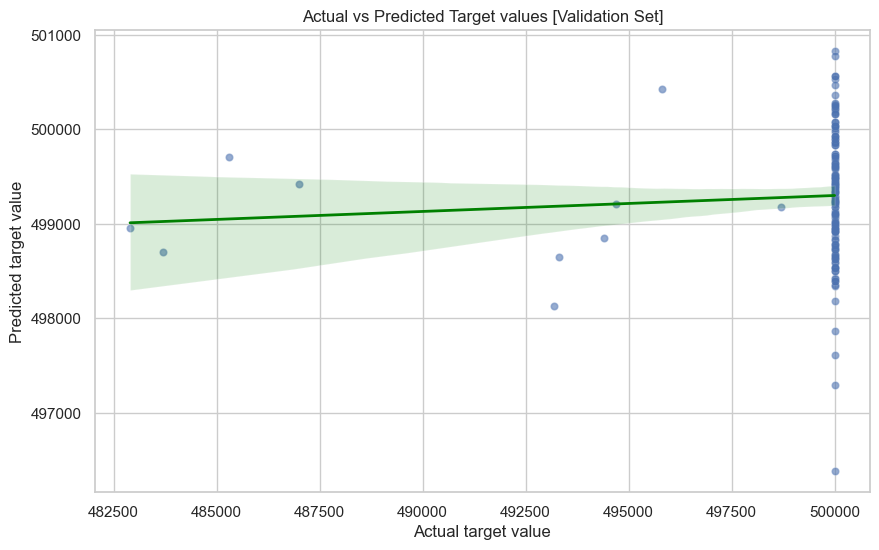

In [391]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_val ,y=linear_pred,alpha=0.4)

sns.regplot(x=y_val ,y=linear_pred,truncate=True,scatter_kws={'s':20,'alpha':0.3},line_kws={'color':'green','linewidth':2})

plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.title("Actual vs Predicted Target values [Validation Set]")

plt.show()

In [392]:
model_desc = DecisionTreeRegressor()

model_desc.fit(X_train,y_train)



DecisionTreeRegressor()

In [393]:
# evaluating the Decision regression model on test data-set

pred_desc = model_desc.predict(X_val)



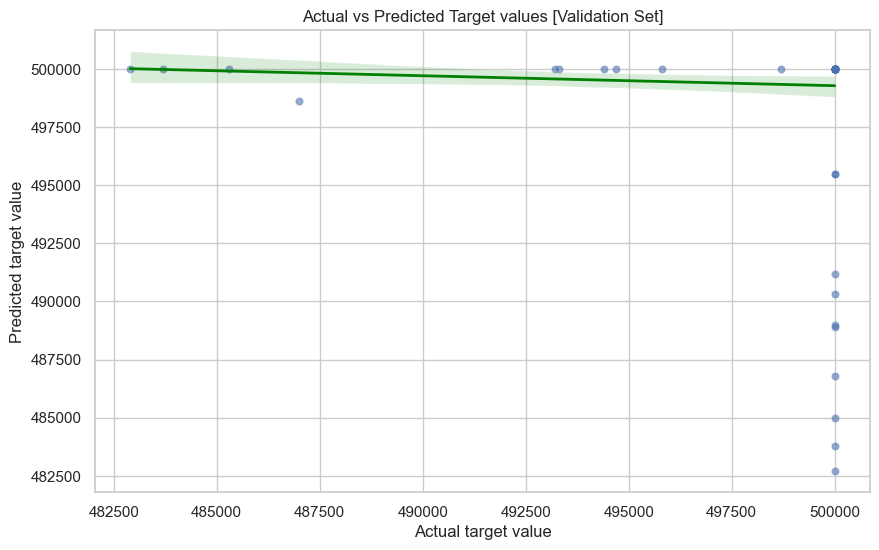

In [394]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_val ,y=pred_desc,alpha=0.4)

sns.regplot(x=y_val ,y=pred_desc,truncate=True,scatter_kws={'s':20,'alpha':0.3},line_kws={'color':'green','linewidth':2})

plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.title("Actual vs Predicted Target values [Validation Set]")



plt.show()

In [395]:
rand_forest_reg = RandomForestRegressor(n_jobs=-1,n_estimators=200)
rand_forest_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [396]:
# evaluating the Decision regression model on test data-set

pred_rand = rand_forest_reg.predict(X_val)



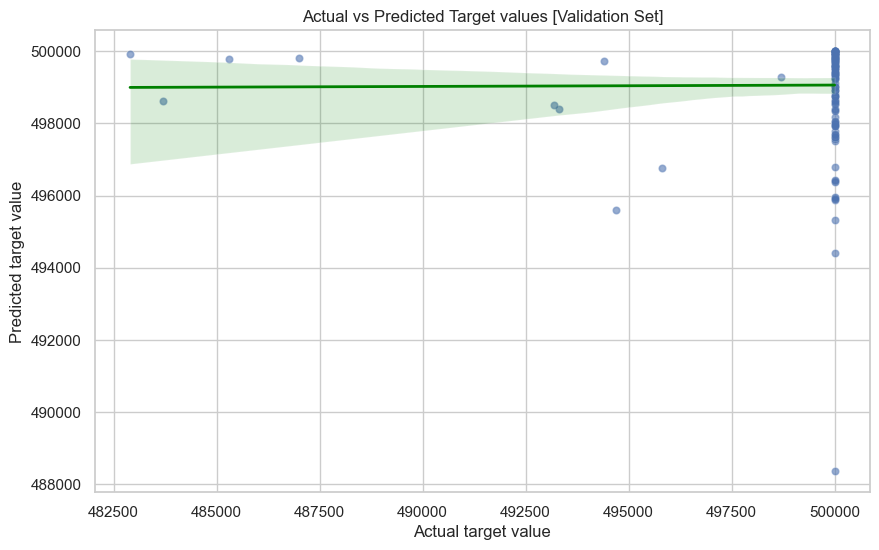

In [397]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_val ,y=pred_rand,alpha=0.4)

sns.regplot(x=y_val ,y=pred_rand,truncate=True,scatter_kws={'s':20,'alpha':0.3},line_kws={'color':'green','linewidth':2})

plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.title("Actual vs Predicted Target values [Validation Set]")

plt.show()

In [398]:
xgbr = XGBRegressor(n_estimator = 1000,learning_rate = 0.01,n_jobs=-1,subsample=0.5,max_depth=5,objective='reg:squarederror')
xgbr.fit(X_train,y_train)

F:\Conestoga\AI and Algo\Fall2023--AI-Algo\venv\Lib\site-packages\xgboost\core.py:160: UserWarning:

[13:26:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=1000, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [399]:
# evaluating the Decision regression model on test data-set

pred_xgbr = model_desc.predict(X_val)


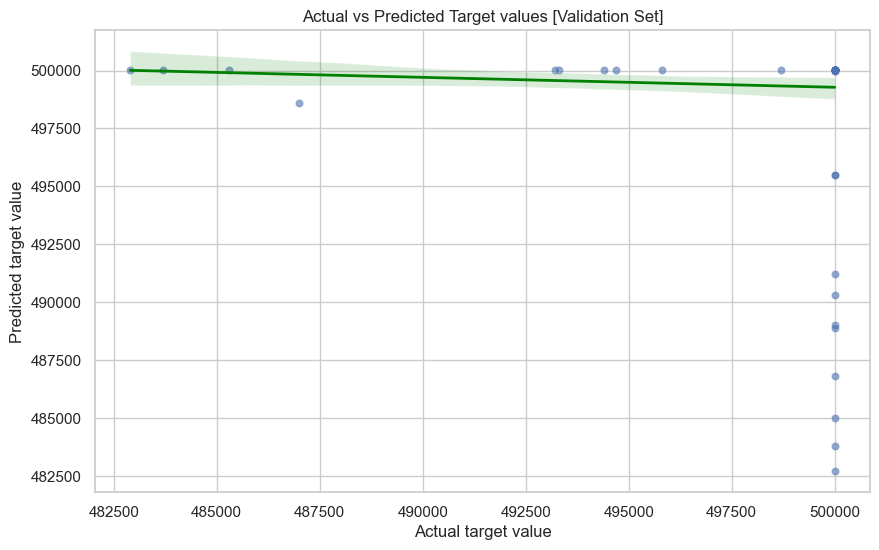

In [400]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_val ,y=pred_xgbr,alpha=0.4)

sns.regplot(x=y_val ,y=pred_xgbr,truncate=True,scatter_kws={'s':20,'alpha':0.3},line_kws={'color':'green','linewidth':2})

plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.title("Actual vs Predicted Target values [Validation Set]")



plt.show()

In [408]:
table = PrettyTable()
table.field_names = ["Model", "R-squared (R²)", "MSE", "MAE"]
for model, mae,mse,r2_score in zip(models,mean_absolute_errors,mean_square_errors,r2_scores):
    table.add_row([model,r2_score,mse,mae])
print(table)

+----------------------------------------------------+----------------------+-------------------+--------------------+
|                       Model                        |    R-squared (R²)    |        MSE        |        MAE         |
+----------------------------------------------------+----------------------+-------------------+--------------------+
|                 LinearRegression()                 | -0.03586226970927586 |  6831716.81805621 | 1247.9614547459355 |
|              DecisionTreeRegressor()               | -1.4201768291656487  | 15961545.49689441 |  1180.27950310559  |
|                  Lasso(alpha=0.1)                  | -0.03571397456063852 | 6830738.782181552 | 1247.508047137839  |
| RandomForestRegressor(n_estimators=200, n_jobs=-1) | -0.33966616168707287 | 8835363.653072372 | 1321.3424844720535 |
+----------------------------------------------------+----------------------+-------------------+--------------------+


In [412]:
mean_absolute_errors[np.argmin(mean_absolute_errors)]

1180.27950310559

In [414]:
pred_rand_test = rand_forest_reg.predict(X_test)

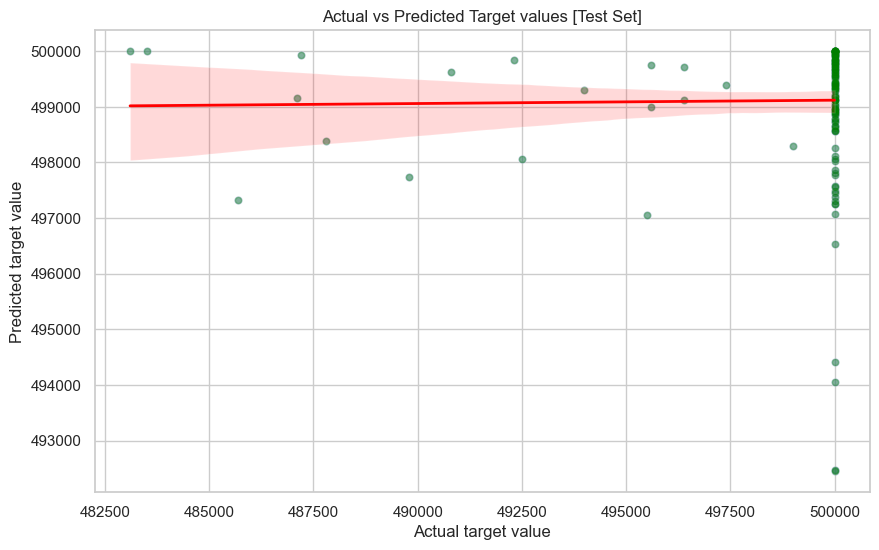

In [418]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=y_test ,y=pred_rand_test,alpha=0.4)

sns.regplot(x=y_test ,y=pred_rand_test,truncate=True,scatter_kws={'s':20,'alpha':0.3, 'color':'green'},line_kws={'color':'red','linewidth':2})

plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.title("Actual vs Predicted Target values [Test Set]")

plt.show()